In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('data/cs-training.csv')
#df = pd.read_csv('data/cs-train_cropped.csv')
df.shape

(120269, 12)

In [8]:
df = df.fillna(df.mean(), axis=0)

In [9]:
df[df.MonthlyIncome > 800000].shape

(5, 12)

In [10]:
def remove_outliers(df, times_std, cols):
    for c in cols:
        df = df[np.abs(df[c] - df[c].mean()) <= (times_std * df[c].std())]
    return df

In [11]:
def remove_outliers_and_print(df, times_std, col):
    for c in col:
        df = remove_outliers(df, times_std, [c])
        plt.scatter(df[df.columns[0]], df[c])
        title = str(c) + ' stripped of outliers with a deviaton of more than ' + str(times_std) + ' times the standard deviation'
        plt.title(title)
        plt.xlabel('id')
        plt.ylabel(c)
    return df

In [12]:
df_proc = df

(120220, 12)

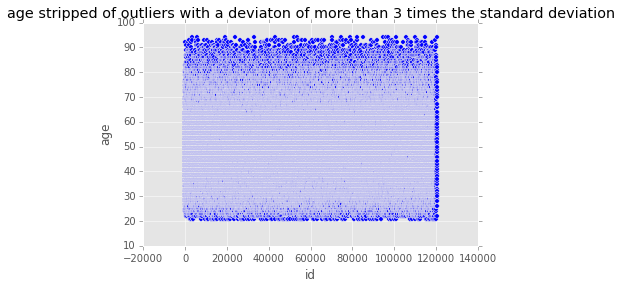

In [13]:
df_proc = remove_outliers_and_print(df_proc, 3, ['age'])
df_proc.shape

(120100, 12)

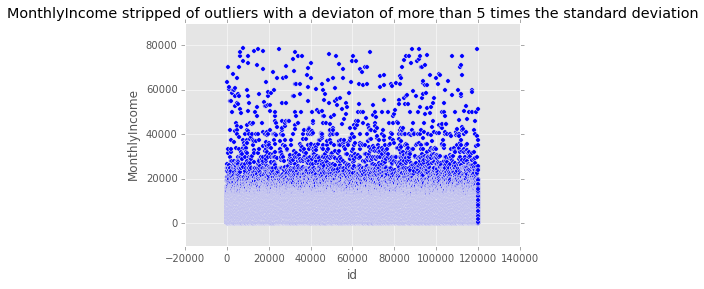

In [14]:
df_proc = remove_outliers_and_print(df_proc, 5, ['MonthlyIncome'])
df_proc.shape

(120098, 12)

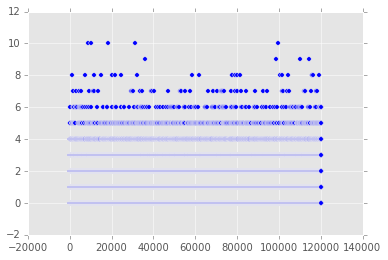

In [15]:
df_proc = df_proc[df_proc.NumberOfDependents <= 10]
plt.scatter(df_proc['Unnamed: 0'], df_proc.NumberOfDependents)
df_proc.shape

(119976, 12)

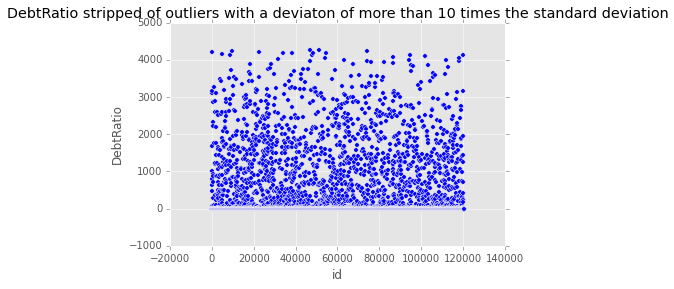

In [16]:
df_proc = remove_outliers_and_print(df_proc, 10, ['DebtRatio'])
df_proc.shape

(119961, 12)

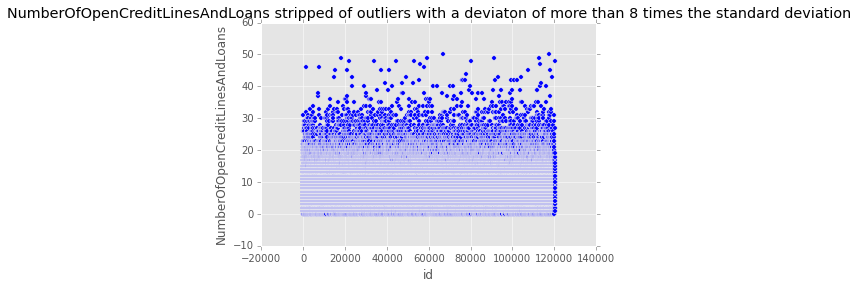

In [17]:
df_proc = remove_outliers_and_print(df_proc, 8, ['NumberOfOpenCreditLinesAndLoans'])
df_proc.shape

(119917, 12)

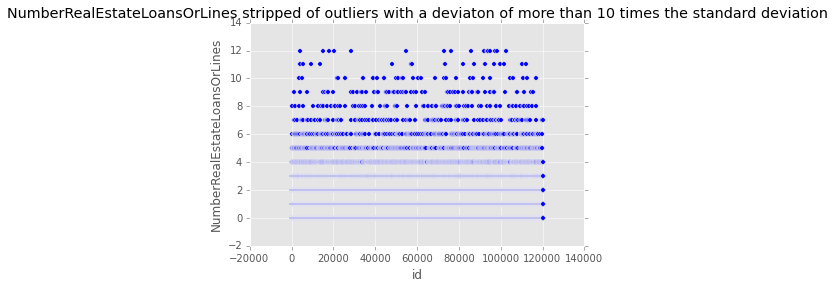

In [18]:
df_proc = remove_outliers_and_print(df_proc, 10, ['NumberRealEstateLoansOrLines'])
df_proc.shape

(119840, 12)

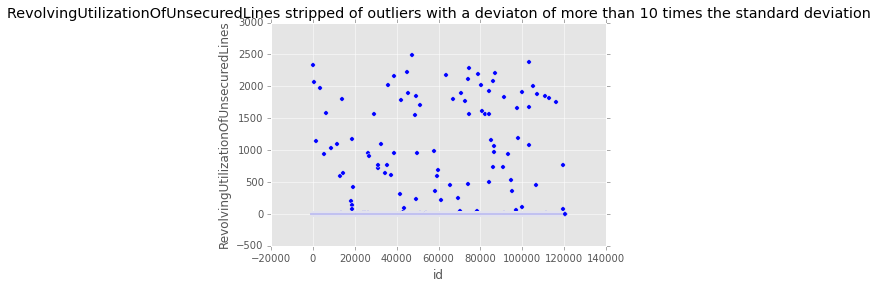

In [19]:
df_proc = remove_outliers_and_print(df_proc, 10, ['RevolvingUtilizationOfUnsecuredLines'])
df_proc.shape

In [20]:
print df_proc[df_proc['SeriousDlqin2yrs'] == 0].shape[0] + df_proc[df_proc['SeriousDlqin2yrs'] == 1].shape[0]
print df_proc.shape[0]

119840
119840


In [21]:
df = df.drop('Unnamed: 0', axis = 1)

In [22]:
df_proc.dropna().shape

(119840, 12)

In [23]:
df_proc = df_proc.drop('Unnamed: 0', axis=1)
df_proc.to_csv('./data/cs-train_clean.csv')
#df_proc.to_csv('./data/cs-train_cropped.csv')